In [1]:
from datetime import datetime, timedelta  
import time  
from collections import namedtuple  
import pandas as pd 
import requests  
import matplotlib.pyplot as plt  

pd.options.mode.chained_assignment = None
API_KEY = '40b453c139590191'  
BASE_URL = "http://api.wunderground.com/api/{}/history_{}/q/Switzerland/Collombey.json"
target_date = datetime(2016, 8, 16)  
features = ["date","meantempm", "meandewptm", "meanpressurem", "maxhumidity", "minhumidity", "maxtempm",  
            "mintempm", "maxdewptm", "mindewptm", "maxpressurem", "minpressurem", "precipm"]
DailySummary = namedtuple("DailySummary", features)

""""def extract_weather_data(url, api_key, target_date, days):  
    records = []
    for _ in range(days):
        request = BASE_URL.format(API_KEY, target_date.strftime('%Y%m%d'))
        response = requests.get(request)
        if response.status_code == 200:
            data = response.json()['history']['dailysummary'][0]
            records.append(DailySummary(
                date=target_date,
                meantempm=data['meantempm'],
                meandewptm=data['meandewptm'],
                meanpressurem=data['meanpressurem'],
                maxhumidity=data['maxhumidity'],
                minhumidity=data['minhumidity'],
                maxtempm=data['maxtempm'],
                mintempm=data['mintempm'],
                maxdewptm=data['maxdewptm'],
                mindewptm=data['mindewptm'],
                maxpressurem=data['maxpressurem'],
                minpressurem=data['minpressurem'],
                precipm=data['precipm']))
        time.sleep(6)
        target_date += timedelta(days=1)
    return records
records = extract_weather_data(BASE_URL, API_KEY, target_date, 500)"""  
#extract the data with weather undergrond's api and set the different type of data we use, pandas is a library used to manipulate data 


'"def extract_weather_data(url, api_key, target_date, days):  \n    records = []\n    for _ in range(days):\n        request = BASE_URL.format(API_KEY, target_date.strftime(\'%Y%m%d\'))\n        response = requests.get(request)\n        if response.status_code == 200:\n            data = response.json()[\'history\'][\'dailysummary\'][0]\n            records.append(DailySummary(\n                date=target_date,\n                meantempm=data[\'meantempm\'],\n                meandewptm=data[\'meandewptm\'],\n                meanpressurem=data[\'meanpressurem\'],\n                maxhumidity=data[\'maxhumidity\'],\n                minhumidity=data[\'minhumidity\'],\n                maxtempm=data[\'maxtempm\'],\n                mintempm=data[\'mintempm\'],\n                maxdewptm=data[\'maxdewptm\'],\n                mindewptm=data[\'mindewptm\'],\n                maxpressurem=data[\'maxpressurem\'],\n                minpressurem=data[\'minpressurem\'],\n                precipm=data[

In [2]:
import pickle 
with open("weather_records", "rb") as f:
    records = pickle.load(f)
#save the data    
    

In [3]:
df = pd.DataFrame(records, columns=features)
print(df)
df.info()
#set a pandas dataframe and use the types of datas as "labels" like a dictionary

          date meantempm meandewptm meanpressurem maxhumidity minhumidity  \
0   2016-08-16        24         12       1015.52          80          14   
1   2016-08-17        22         12       1012.45          76          21   
2   2016-08-18        18         14       1012.43          91          49   
3   2016-08-19        22         15       1011.39          95          34   
4   2016-08-20        18         15       1016.12          88          60   
5   2016-08-21        18         10       1020.80          92          25   
6   2016-08-22        18          8       1026.82          76          22   
7   2016-08-23        20         12       1024.98          82          25   
8   2016-08-24        23         13       1020.53          82          23   
9   2016-08-25        24         14       1017.46          80          23   
10  2016-08-26        25         16       1017.41          75          25   
11  2016-08-27        26         16       1017.84          85          26   

In [4]:
#the goal with this project is to use the information from the days x-1, x-2,...x-n to predict the mean temperature at a day x
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements

In [5]:
for feature in features:
    if feature != 'date':
        for N in range(1,4):
            derive_nth_day_feature(df, feature, N)

In [6]:
#print the labels (type of data)
df.columns

Index(['date', 'meantempm', 'meandewptm', 'meanpressurem', 'maxhumidity',
       'minhumidity', 'maxtempm', 'mintempm', 'maxdewptm', 'mindewptm',
       'maxpressurem', 'minpressurem', 'precipm', 'meantempm_1', 'meantempm_2',
       'meantempm_3', 'meandewptm_1', 'meandewptm_2', 'meandewptm_3',
       'meanpressurem_1', 'meanpressurem_2', 'meanpressurem_3',
       'maxhumidity_1', 'maxhumidity_2', 'maxhumidity_3', 'minhumidity_1',
       'minhumidity_2', 'minhumidity_3', 'maxtempm_1', 'maxtempm_2',
       'maxtempm_3', 'mintempm_1', 'mintempm_2', 'mintempm_3', 'maxdewptm_1',
       'maxdewptm_2', 'maxdewptm_3', 'mindewptm_1', 'mindewptm_2',
       'mindewptm_3', 'maxpressurem_1', 'maxpressurem_2', 'maxpressurem_3',
       'minpressurem_1', 'minpressurem_2', 'minpressurem_3', 'precipm_1',
       'precipm_2', 'precipm_3'],
      dtype='object')

In [83]:
#cleaning data, we remove the useless data
to_remove = [feature for feature in features if feature not in ["meantempm", "mintempm", "maxtempm"]]

to_keep = [col for col in df.columns if col not in to_remove]

df = df[to_keep]
df.columns

Index(['meantempm', 'maxtempm', 'mintempm', 'meantempm_1', 'meantempm_2',
       'meantempm_3', 'meandewptm_1', 'meandewptm_2', 'meandewptm_3',
       'meanpressurem_1', 'meanpressurem_2', 'meanpressurem_3',
       'maxhumidity_1', 'maxhumidity_2', 'maxhumidity_3', 'minhumidity_1',
       'minhumidity_2', 'minhumidity_3', 'maxtempm_1', 'maxtempm_2',
       'maxtempm_3', 'mintempm_1', 'mintempm_2', 'mintempm_3', 'maxdewptm_1',
       'maxdewptm_2', 'maxdewptm_3', 'mindewptm_1', 'mindewptm_2',
       'mindewptm_3', 'maxpressurem_1', 'maxpressurem_2', 'maxpressurem_3',
       'minpressurem_1', 'minpressurem_2', 'minpressurem_3', 'precipm_1',
       'precipm_2', 'precipm_3'],
      dtype='object')

In [101]:
#change the datatype from "object" to "int" or "float"
#df = df.apply(pd.to_numeric, errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 3 to 998
Data columns (total 37 columns):
meantempm          996 non-null int64
meantempm_1        996 non-null float64
meantempm_2        996 non-null float64
meantempm_3        996 non-null float64
meandewptm_1       996 non-null float64
meandewptm_2       996 non-null float64
meandewptm_3       996 non-null float64
meanpressurem_1    996 non-null float64
meanpressurem_2    996 non-null float64
meanpressurem_3    996 non-null float64
maxhumidity_1      996 non-null float64
maxhumidity_2      996 non-null float64
maxhumidity_3      996 non-null float64
minhumidity_1      996 non-null float64
minhumidity_2      996 non-null float64
minhumidity_3      996 non-null float64
maxtempm_1         996 non-null float64
maxtempm_2         996 non-null float64
maxtempm_3         996 non-null float64
mintempm_1         996 non-null float64
mintempm_2         996 non-null float64
mintempm_3         996 non-null float64
maxdewptm_1      

In [9]:
#drop the missing data
df = df.dropna()

In [91]:
df = df.drop(['mintempm', 'maxtempm'], axis=1)

KeyError: "labels ['mintempm' 'maxtempm'] not contained in axis"

In [92]:
X = df[[col for col in df.columns if col != 'meantempm']]
y = df['meantempm'] 

In [93]:

from sklearn.metrics import explained_variance_score,mean_absolute_error,median_absolute_error
from sklearn.model_selection import train_test_split  

In [94]:
import tensorflow as tf 

In [95]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [96]:
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   796, Training features   36
Validation instances 100, Validation features 36
Testing instances    100, Testing features    36


In [97]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]
print(X)

     meantempm_1  meantempm_2  meantempm_3  meandewptm_1  meandewptm_2  \
3           18.0         22.0         24.0          14.0          12.0   
4           22.0         18.0         22.0          15.0          14.0   
5           18.0         22.0         18.0          15.0          15.0   
6           18.0         18.0         22.0          10.0          15.0   
7           18.0         18.0         18.0           8.0          10.0   
8           20.0         18.0         18.0          12.0           8.0   
9           23.0         20.0         18.0          13.0          12.0   
10          24.0         23.0         20.0          14.0          13.0   
11          25.0         24.0         23.0          16.0          14.0   
12          26.0         25.0         24.0          16.0          16.0   
13          23.0         26.0         25.0          15.0          16.0   
14          22.0         23.0         26.0          15.0          15.0   
15          22.0         22.0         

In [98]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,  
                                      hidden_units=[50, 50])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Maxwell\\AppData\\Local\\Temp\\tmpaczhb773', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E80B961240>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [99]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [19]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from tensorflow.python.estimator.inputs.queues import feeding_functions




def pandas_input_fn(x,
                    y=None,
                    batch_size=128,
                    num_epochs=1,
                    shuffle=None,
                    queue_capacity=1000,
                    num_threads=1,
                    target_column='target'):
  """Returns input function that would feed Pandas DataFrame into the model.

  Note: `y`'s index must match `x`'s index.

  Args:
    x: pandas `DataFrame` object.
    y: pandas `Series` object. `None` if absent.
    batch_size: int, size of batches to return.
    num_epochs: int, number of epochs to iterate over data. If not `None`,
      read attempts that would exceed this value will raise `OutOfRangeError`.
    shuffle: bool, whether to read the records in random order.
    queue_capacity: int, size of the read queue. If `None`, it will be set
      roughly to the size of `x`.
    num_threads: Integer, number of threads used for reading and enqueueing. In
      order to have predicted and repeatable order of reading and enqueueing,
      such as in prediction and evaluation mode, `num_threads` should be 1.
    target_column: str, name to give the target column `y`.

  Returns:
    Function, that has signature of ()->(dict of `features`, `target`)

  Raises:
    ValueError: if `x` already contains a column with the same name as `y`, or
      if the indexes of `x` and `y` don't match.
    TypeError: `shuffle` is not bool.
  """
  if not HAS_PANDAS:
    raise TypeError(
        'pandas_input_fn should not be called without pandas installed')

  if not isinstance(shuffle, bool):
    raise TypeError('shuffle must be explicitly set as boolean; '
                    'got {}'.format(shuffle))

  x = x.copy()
  if y is not None:
    if target_column in x:
      raise ValueError(
          'Cannot use name %s for target column: DataFrame already has a '
          'column with that name: %s' % (target_column, x.columns))
    if not np.array_equal(x.index, y.index):
      raise ValueError('Index for x and y are mismatched.\nIndex for x: %s\n'
                       'Index for y: %s\n' % (x.index, y.index))
    x[target_column] = y

  # TODO(mdan): These are memory copies. We probably don't need 4x slack space.
  # The sizes below are consistent with what I've seen elsewhere.
  if queue_capacity is None:
    if shuffle:
      queue_capacity = 4 * len(x)
    else:
      queue_capacity = len(x)
  min_after_dequeue = max(queue_capacity / 4, 1)

  def input_fn():
    """Pandas input function."""
    queue = feeding_functions._enqueue_data(  # pylint: disable=protected-access
        x,
        queue_capacity,
        shuffle=shuffle,
        min_after_dequeue=min_after_dequeue,
        num_threads=num_threads,
        enqueue_size=batch_size,
        num_epochs=num_epochs)
    if num_epochs is None:
      features = queue.dequeue_many(batch_size)
    else:
      features = queue.dequeue_up_to(batch_size)
    assert len(features) == len(x.columns) + 1, ('Features should have one '
                                                 'extra element for the index.')
    features = features[1:]
    features = dict(zip(list(x.columns), features))
    if y is not None:
      target = features.pop(target_column)
      return features, target
    return features
  return input_fn

In [100]:
evaluations = []
STEPS = 40
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:loss = 14534145.0, step = 1
INFO:tensorflow:Saving checkpoints for 40 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:Loss for final step: 31538.291.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:16:44
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-40
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-17-17:16:44
INFO:tenso

INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-17-17:17:09
INFO:tensorflow:Saving dict for global step 200: average_loss = 19.644995, global_step = 200, loss = 1964.4995
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 201 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:loss = 7946.6113, step = 201
INFO:tensorflow:Saving checkpoints for 240 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:Loss for final step: 53

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-17-17:17:37
INFO:tensorflow:Saving dict for global step 400: average_loss = 8.144735, global_step = 400, loss = 814.4735
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:17:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-17-17:17:38
INFO:tensorflow:Saving dict for global step 400: average_loss = 8.144735, global_step = 400, loss = 814.4735
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters 

INFO:tensorflow:loss = 3473.9146, step = 561
INFO:tensorflow:Saving checkpoints for 600 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:Loss for final step: 4013.7656.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:18:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-17-17:18:07
INFO:tensorflow:Saving dict for global step 600: average_loss = 7.9027953, global_step = 600, loss = 790.27954
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:18:07
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Loc

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-760
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 761 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:loss = 3265.788, step = 761
INFO:tensorflow:Saving checkpoints for 800 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:Loss for final step: 3100.494.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:18:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_ini

INFO:tensorflow:Starting evaluation at 2018-07-17-17:18:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-960
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-17-17:19:00
INFO:tensorflow:Saving dict for global step 960: average_loss = 7.4389973, global_step = 960, loss = 743.8997
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-960
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 961 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:loss = 3303.754, step = 961
INFO:tensorflow:Saving checkpoints for 1000 into C:\U

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-1160
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-17-17:19:28
INFO:tensorflow:Saving dict for global step 1160: average_loss = 7.1880846, global_step = 1160, loss = 718.8085
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:19:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-1160
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-17-17:19:29
INFO:tensorflow:Saving dict for global step 1160: average_loss = 7.1880846, global_step = 1160, loss = 718.8085
INFO:tensorflow:Calling model_fn.
INFO:te

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1321 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:loss = 3197.1934, step = 1321
INFO:tensorflow:Saving checkpoints for 1360 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:Loss for final step: 3162.3796.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:19:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-1360
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-17-17:19:56
INFO:tensorflow:Saving dict for global step 1360: average_loss = 6.9971437, global_step = 1360, loss = 699.71436
INFO:tensorflow:Calling model_fn.
INFO:ten

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-17-17:20:19
INFO:tensorflow:Saving dict for global step 1520: average_loss = 6.8971143, global_step = 1520, loss = 689.7114
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-1520
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1521 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:loss = 2829.3894, step = 1521
INFO:tensorflow:Saving checkpoints for 1560 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:Loss for final step: 3151.9.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Start

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-17-17:20:47
INFO:tensorflow:Saving dict for global step 1720: average_loss = 6.7433095, global_step = 1720, loss = 674.33093
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:20:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-1720
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-17-17:20:48
INFO:tensorflow:Saving dict for global step 1720: average_loss = 6.7433095, global_step = 1720, loss = 674.33093
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\

INFO:tensorflow:loss = 2427.303, step = 1881
INFO:tensorflow:Saving checkpoints for 1920 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:Loss for final step: 2327.4333.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:21:15
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-1920
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-17-17:21:16
INFO:tensorflow:Saving dict for global step 1920: average_loss = 6.585622, global_step = 1920, loss = 658.5622
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:21:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\L

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-2080
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2081 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:loss = 3064.8235, step = 2081
INFO:tensorflow:Saving checkpoints for 2120 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:Loss for final step: 2448.1682.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:21:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-2120
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running lo

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:22:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-17-17:22:07
INFO:tensorflow:Saving dict for global step 2280: average_loss = 6.3783197, global_step = 2280, loss = 637.832
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-2280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2281 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:loss

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:22:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-2480
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-17-17:22:33
INFO:tensorflow:Saving dict for global step 2480: average_loss = 6.277618, global_step = 2480, loss = 627.7618
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:22:33
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-2480
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-17-17:22:34
INFO:tensorflow:Saving dict for global step 2480: averag

INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-2640
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2641 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:loss = 2192.0576, step = 2641
INFO:tensorflow:Saving checkpoints for 2680 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:Loss for final step: 2392.7773.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:23:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-2680
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-17-17:23:00
INFO:tensorflow:Saving dict for global step 2680:

INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-2840
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-17-17:23:24
INFO:tensorflow:Saving dict for global step 2840: average_loss = 6.1398997, global_step = 2840, loss = 613.99
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-2840
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2841 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:loss = 2815.021, step = 2841
INFO:tensorflow:Saving checkpoints for 2880 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:Loss for final step:

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-17-17:23:51
INFO:tensorflow:Saving dict for global step 3040: average_loss = 6.045903, global_step = 3040, loss = 604.59033
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:23:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-3040
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-17-17:23:52
INFO:tensorflow:Saving dict for global step 3040: average_loss = 6.045903, global_step = 3040, loss = 604.59033
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring para

INFO:tensorflow:loss = 2488.7954, step = 3201
INFO:tensorflow:Saving checkpoints for 3240 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:Loss for final step: 2178.003.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:24:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-3240
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-17-17:24:17
INFO:tensorflow:Saving dict for global step 3240: average_loss = 6.0513525, global_step = 3240, loss = 605.13525
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:24:18
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-3400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3401 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:loss = 2329.8828, step = 3401
INFO:tensorflow:Saving checkpoints for 3440 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:Loss for final step: 2215.2202.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:24:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-3440
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running lo

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:25:05
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-3600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-17-17:25:06
INFO:tensorflow:Saving dict for global step 3600: average_loss = 5.856129, global_step = 3600, loss = 585.6129
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-3600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3601 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:loss

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:25:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-3800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-17-17:25:32
INFO:tensorflow:Saving dict for global step 3800: average_loss = 5.8389034, global_step = 3800, loss = 583.8903
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:25:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-3800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-17-17:25:33
INFO:tensorflow:Saving dict for global step 3800: avera

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3961 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:loss = 2854.996, step = 3961
INFO:tensorflow:Saving checkpoints for 4000 into C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt.
INFO:tensorflow:Loss for final step: 2137.5942.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-17:25:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmpaczhb773\model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-17-17:25:58
INFO:tensorflow:Saving dict for global step 4000: average_loss = 5.7409062, global_step = 4000, loss = 574.09064
INFO:tensorflow:Calling model_fn.
INFO:tens

In [7]:
df = df.reset_index(drop=True)

In [30]:
#evaluations = []
STEPS = 400
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-5200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5201 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 1640.0759, step = 5201
INFO:tensorflow:global_step/sec: 57.1429
INFO:tensorflow:loss = 1308.7642, step = 5301 (1.751 sec)
INFO:tensorflow:global_step/sec: 63.6553
INFO:tensorflow:loss = 1240.9929, step = 5401 (1.572 sec)
INFO:tensorflow:global_step/sec: 61.2753
INFO:tensorflow:loss = 1145.8972, step = 5501 (1.631 sec)
INFO:tensorflow:Saving checkpoints for 5600 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 1640.9717.
INFO:tensorflow:Calling model_fn.
INFO:tensorflo

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-6800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 6801 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 1407.2222, step = 6801
INFO:tensorflow:global_step/sec: 60.0973
INFO:tensorflow:loss = 1093.7977, step = 6901 (1.666 sec)
INFO:tensorflow:global_step/sec: 66.4459
INFO:tensorflow:loss = 1509.3768, step = 7001 (1.504 sec)
INFO:tensorflow:global_step/sec: 65.1474
INFO:tensorflow:loss = 1479.2435, step = 7101 (1.536 sec)
INFO:tensorflow:Saving checkpoints for 7200 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 1501.1243.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tens

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-8400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8401 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 922.8397, step = 8401
INFO:tensorflow:global_step/sec: 58.6512
INFO:tensorflow:loss = 916.0211, step = 8501 (1.706 sec)
INFO:tensorflow:global_step/sec: 65.7039
INFO:tensorflow:loss = 1308.5759, step = 8601 (1.522 sec)
INFO:tensorflow:global_step/sec: 64.8113
INFO:tensorflow:loss = 957.07666, step = 8701 (1.543 sec)
INFO:tensorflow:Saving checkpoints for 8800 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 1212.1232.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10001 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 825.4187, step = 10001
INFO:tensorflow:global_step/sec: 58.2767
INFO:tensorflow:loss = 682.0365, step = 10101 (1.717 sec)
INFO:tensorflow:global_step/sec: 64.8516
INFO:tensorflow:loss = 1113.9515, step = 10201 (1.542 sec)
INFO:tensorflow:global_step/sec: 66.226
INFO:tensorflow:loss = 776.14966, step = 10301 (1.510 sec)
INFO:tensorflow:Saving checkpoints for 10400 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 844.58795.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:22:05
INFO:tensorflow:Graph was fin

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-11600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 11601 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 773.77734, step = 11601
INFO:tensorflow:global_step/sec: 59.8094
INFO:tensorflow:loss = 1063.8843, step = 11701 (1.674 sec)
INFO:tensorflow:global_step/sec: 57.9382
INFO:tensorflow:loss = 640.57117, step = 11801 (1.725 sec)
INFO:tensorflow:global_step/sec: 63.9792
INFO:tensorflow:loss = 616.1776, step = 11901 (1.563 sec)
INFO:tensorflow:Saving checkpoints for 12000 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 1296.188.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:22:49
INFO:tensorflow:Graph was fi

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-13200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 13201 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 554.8263, step = 13201
INFO:tensorflow:global_step/sec: 60.865
INFO:tensorflow:loss = 651.3086, step = 13301 (1.644 sec)
INFO:tensorflow:global_step/sec: 65.877
INFO:tensorflow:loss = 592.5862, step = 13401 (1.519 sec)
INFO:tensorflow:global_step/sec: 65.5315
INFO:tensorflow:loss = 550.4797, step = 13501 (1.526 sec)
INFO:tensorflow:Saving checkpoints for 13600 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 559.10474.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:23:34
INFO:tensorflow:Graph was finali

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-14800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 14801 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 598.31067, step = 14801
INFO:tensorflow:global_step/sec: 50.1262
INFO:tensorflow:loss = 830.3539, step = 14901 (1.996 sec)
INFO:tensorflow:global_step/sec: 54.231
INFO:tensorflow:loss = 512.6251, step = 15001 (1.844 sec)
INFO:tensorflow:global_step/sec: 54.5258
INFO:tensorflow:loss = 880.23376, step = 15101 (1.835 sec)
INFO:tensorflow:Saving checkpoints for 15200 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 829.1867.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:24:23
INFO:tensorflow:Graph was fina

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-16400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 16401 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 464.0365, step = 16401
INFO:tensorflow:global_step/sec: 52.5213
INFO:tensorflow:loss = 757.53705, step = 16501 (1.905 sec)
INFO:tensorflow:global_step/sec: 54.7656
INFO:tensorflow:loss = 532.8534, step = 16601 (1.826 sec)
INFO:tensorflow:global_step/sec: 52.4115
INFO:tensorflow:loss = 556.3699, step = 16701 (1.908 sec)
INFO:tensorflow:Saving checkpoints for 16800 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 715.9411.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:25:18
INFO:tensorflow:Graph was fina

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-18000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 18001 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 497.42496, step = 18001
INFO:tensorflow:global_step/sec: 57.4398
INFO:tensorflow:loss = 491.03326, step = 18101 (1.742 sec)
INFO:tensorflow:global_step/sec: 60.79
INFO:tensorflow:loss = 643.08875, step = 18201 (1.645 sec)
INFO:tensorflow:global_step/sec: 62.306
INFO:tensorflow:loss = 457.56897, step = 18301 (1.605 sec)
INFO:tensorflow:Saving checkpoints for 18400 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 406.10828.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:26:10
INFO:tensorflow:Graph was fin

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-19600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 19601 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 579.4007, step = 19601
INFO:tensorflow:global_step/sec: 53.448
INFO:tensorflow:loss = 809.0755, step = 19701 (1.873 sec)
INFO:tensorflow:global_step/sec: 59.1374
INFO:tensorflow:loss = 590.2969, step = 19801 (1.691 sec)
INFO:tensorflow:global_step/sec: 60.7171
INFO:tensorflow:loss = 423.9986, step = 19901 (1.647 sec)
INFO:tensorflow:Saving checkpoints for 20000 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 442.08252.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:26:59
INFO:tensorflow:Graph was final

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-21200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 21201 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 618.25366, step = 21201
INFO:tensorflow:global_step/sec: 54.0848
INFO:tensorflow:loss = 565.8949, step = 21301 (1.849 sec)
INFO:tensorflow:global_step/sec: 59.7697
INFO:tensorflow:loss = 576.2437, step = 21401 (1.673 sec)
INFO:tensorflow:global_step/sec: 64.5042
INFO:tensorflow:loss = 412.90247, step = 21501 (1.637 sec)
INFO:tensorflow:Saving checkpoints for 21600 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 530.4147.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:27:47
INFO:tensorflow:Graph was fin

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-22800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 22801 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 346.69714, step = 22801
INFO:tensorflow:global_step/sec: 55.4631
INFO:tensorflow:loss = 520.14233, step = 22901 (1.805 sec)
INFO:tensorflow:global_step/sec: 57.079
INFO:tensorflow:loss = 465.9687, step = 23001 (1.751 sec)
INFO:tensorflow:global_step/sec: 60.4237
INFO:tensorflow:loss = 488.3584, step = 23101 (1.656 sec)
INFO:tensorflow:Saving checkpoints for 23200 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 482.309.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:28:37
INFO:tensorflow:Graph was final

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-24400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 24401 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 325.65918, step = 24401
INFO:tensorflow:global_step/sec: 52.7154
INFO:tensorflow:loss = 333.12405, step = 24501 (1.898 sec)
INFO:tensorflow:global_step/sec: 57.0124
INFO:tensorflow:loss = 601.09686, step = 24601 (1.753 sec)
INFO:tensorflow:global_step/sec: 49.5552
INFO:tensorflow:loss = 344.81436, step = 24701 (2.019 sec)
INFO:tensorflow:Saving checkpoints for 24800 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 331.09152.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:29:28
INFO:tensorflow:Graph was 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-26000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 26001 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 330.90997, step = 26001
INFO:tensorflow:global_step/sec: 46.2113
INFO:tensorflow:loss = 302.2129, step = 26101 (2.165 sec)
INFO:tensorflow:global_step/sec: 61.5755
INFO:tensorflow:loss = 440.49298, step = 26201 (1.624 sec)
INFO:tensorflow:global_step/sec: 54.3786
INFO:tensorflow:loss = 297.67346, step = 26301 (1.838 sec)
INFO:tensorflow:Saving checkpoints for 26400 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 467.77023.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:30:16
INFO:tensorflow:Graph was f

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-27600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 27601 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 403.62854, step = 27601
INFO:tensorflow:global_step/sec: 54.9169
INFO:tensorflow:loss = 388.00555, step = 27701 (1.823 sec)
INFO:tensorflow:global_step/sec: 58.9283
INFO:tensorflow:loss = 267.7085, step = 27801 (1.696 sec)
INFO:tensorflow:global_step/sec: 47.9852
INFO:tensorflow:loss = 253.68172, step = 27901 (2.084 sec)
INFO:tensorflow:Saving checkpoints for 28000 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 263.39957.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:31:05
INFO:tensorflow:Graph was f

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-29200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 29201 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 380.3283, step = 29201
INFO:tensorflow:global_step/sec: 55.6198
INFO:tensorflow:loss = 261.19736, step = 29301 (1.845 sec)
INFO:tensorflow:global_step/sec: 61.0136
INFO:tensorflow:loss = 376.61414, step = 29401 (1.594 sec)
INFO:tensorflow:global_step/sec: 56.1489
INFO:tensorflow:loss = 267.72537, step = 29501 (1.781 sec)
INFO:tensorflow:Saving checkpoints for 29600 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 390.57742.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:31:52
INFO:tensorflow:Graph was f

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-30800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 30801 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 259.491, step = 30801
INFO:tensorflow:global_step/sec: 52.1382
INFO:tensorflow:loss = 254.37654, step = 30901 (1.918 sec)
INFO:tensorflow:global_step/sec: 52.8001
INFO:tensorflow:loss = 269.09265, step = 31001 (1.895 sec)
INFO:tensorflow:global_step/sec: 53.793
INFO:tensorflow:loss = 319.3765, step = 31101 (1.860 sec)
INFO:tensorflow:Saving checkpoints for 31200 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 243.96782.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:32:43
INFO:tensorflow:Graph was fina

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-32400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 32401 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 218.96075, step = 32401
INFO:tensorflow:global_step/sec: 53.334
INFO:tensorflow:loss = 230.56863, step = 32501 (1.883 sec)
INFO:tensorflow:global_step/sec: 56.0231
INFO:tensorflow:loss = 206.66925, step = 32601 (1.778 sec)
INFO:tensorflow:global_step/sec: 58.6862
INFO:tensorflow:loss = 326.96045, step = 32701 (1.705 sec)
INFO:tensorflow:Saving checkpoints for 32800 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 210.2045.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:33:34
INFO:tensorflow:Graph was fi

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-34000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 34001 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 241.24219, step = 34001
INFO:tensorflow:global_step/sec: 57.4376
INFO:tensorflow:loss = 377.75848, step = 34101 (1.742 sec)
INFO:tensorflow:global_step/sec: 64.6855
INFO:tensorflow:loss = 228.23672, step = 34201 (1.546 sec)
INFO:tensorflow:global_step/sec: 64.9358
INFO:tensorflow:loss = 318.57053, step = 34301 (1.540 sec)
INFO:tensorflow:Saving checkpoints for 34400 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 211.336.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:34:20
INFO:tensorflow:Graph was fi

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-35600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 35601 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 223.93144, step = 35601
INFO:tensorflow:global_step/sec: 42.7721
INFO:tensorflow:loss = 271.1699, step = 35701 (2.341 sec)
INFO:tensorflow:global_step/sec: 46.466
INFO:tensorflow:loss = 277.37634, step = 35801 (2.151 sec)
INFO:tensorflow:global_step/sec: 48.5304
INFO:tensorflow:loss = 291.503, step = 35901 (2.062 sec)
INFO:tensorflow:Saving checkpoints for 36000 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 330.70935.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:35:11
INFO:tensorflow:Graph was fina

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-37200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 37201 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 248.4256, step = 37201
INFO:tensorflow:global_step/sec: 60.7551
INFO:tensorflow:loss = 293.92874, step = 37301 (1.647 sec)
INFO:tensorflow:global_step/sec: 66.4019
INFO:tensorflow:loss = 195.49274, step = 37401 (1.506 sec)
INFO:tensorflow:global_step/sec: 67.2956
INFO:tensorflow:loss = 193.75092, step = 37501 (1.486 sec)
INFO:tensorflow:Saving checkpoints for 37600 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 320.8376.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:35:58
INFO:tensorflow:Graph was fi

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-38800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 38801 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 204.91202, step = 38801
INFO:tensorflow:global_step/sec: 43.6686
INFO:tensorflow:loss = 193.90482, step = 38901 (2.291 sec)
INFO:tensorflow:global_step/sec: 59.6305
INFO:tensorflow:loss = 196.67194, step = 39001 (1.676 sec)
INFO:tensorflow:global_step/sec: 58.3657
INFO:tensorflow:loss = 174.88351, step = 39101 (1.715 sec)
INFO:tensorflow:Saving checkpoints for 39200 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 193.28812.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:36:48
INFO:tensorflow:Graph was 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-40400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 40401 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 223.42267, step = 40401
INFO:tensorflow:global_step/sec: 55.2493
INFO:tensorflow:loss = 240.14339, step = 40501 (1.811 sec)
INFO:tensorflow:global_step/sec: 58.9574
INFO:tensorflow:loss = 181.94077, step = 40601 (1.696 sec)
INFO:tensorflow:global_step/sec: 57.5712
INFO:tensorflow:loss = 292.88254, step = 40701 (1.737 sec)
INFO:tensorflow:Saving checkpoints for 40800 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 247.83842.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:37:37
INFO:tensorflow:Graph was 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-42000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 42001 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 235.53337, step = 42001
INFO:tensorflow:global_step/sec: 56.1174
INFO:tensorflow:loss = 161.50003, step = 42101 (1.783 sec)
INFO:tensorflow:global_step/sec: 63.8578
INFO:tensorflow:loss = 162.60315, step = 42201 (1.566 sec)
INFO:tensorflow:global_step/sec: 60.5194
INFO:tensorflow:loss = 210.99246, step = 42301 (1.652 sec)
INFO:tensorflow:Saving checkpoints for 42400 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 225.18906.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:38:25
INFO:tensorflow:Graph was 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-43600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 43601 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:loss = 149.25232, step = 43601
INFO:tensorflow:global_step/sec: 59.2434
INFO:tensorflow:loss = 152.01878, step = 43701 (1.689 sec)
INFO:tensorflow:global_step/sec: 63.2953
INFO:tensorflow:loss = 182.73239, step = 43801 (1.580 sec)
INFO:tensorflow:global_step/sec: 63.8139
INFO:tensorflow:loss = 221.04558, step = 43901 (1.567 sec)
INFO:tensorflow:Saving checkpoints for 44000 into C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt.
INFO:tensorflow:Loss for final step: 205.83952.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-17-15:39:14
INFO:tensorflow:Graph was 

In [41]:
df = df.drop(['mintempm', 'maxtempm'], axis=1)

KeyError: "labels ['mintempm' 'maxtempm'] not contained in axis"

In [22]:
df = df.drop(['date'], axis=1)
print(df)

KeyError: "labels ['date'] not contained in axis"

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 3 to 998
Data columns (total 39 columns):
meantempm          996 non-null int64
maxtempm           996 non-null int64
mintempm           996 non-null int64
meantempm_1        996 non-null float64
meantempm_2        996 non-null float64
meantempm_3        996 non-null float64
meandewptm_1       996 non-null float64
meandewptm_2       996 non-null float64
meandewptm_3       996 non-null float64
meanpressurem_1    996 non-null float64
meanpressurem_2    996 non-null float64
meanpressurem_3    996 non-null float64
maxhumidity_1      996 non-null float64
maxhumidity_2      996 non-null float64
maxhumidity_3      996 non-null float64
minhumidity_1      996 non-null float64
minhumidity_2      996 non-null float64
minhumidity_3      996 non-null float64
maxtempm_1         996 non-null float64
maxtempm_2         996 non-null float64
maxtempm_3         996 non-null float64
mintempm_1         996 non-null float64
mintempm_2         99

In [34]:
evaluations = []
STEPS = 400
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 40001 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2532.8037, step = 40001
INFO:tensorflow:global_step/sec: 57.5381
INFO:tensorflow:loss = 2040.0323, step = 40101 (1.739 sec)
INFO:tensorflow:global_step/sec: 60.4969
INFO:tensorflow:loss = 2357.8103, step = 40201 (1.653 sec)
INFO:tensorflow:global_step/sec: 68.2133
INFO:tensorflow:loss = 2578.1055, step = 40301 (1.465 sec)
INFO:tensorflow:Saving checkpoints for 40400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2347.4814.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:45:58
INFO:tensorflow:G

INFO:tensorflow:Saving checkpoints for 42000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2510.942.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:46:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-42000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-06-25-12:46:47
INFO:tensorflow:Saving dict for global step 42000: average_loss = 5.2722473, global_step = 42000, loss = 527.22473
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:46:47
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-42000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished e

INFO:tensorflow:Starting evaluation at 2018-06-25-12:47:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-43600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-25-12:47:34
INFO:tensorflow:Saving dict for global step 43600: average_loss = 5.254506, global_step = 43600, loss = 525.4506
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-43600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 43601 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2887.3325, step = 43601
INFO:tensorflow:global_step/sec: 48.2632
INFO:tensorflow:loss = 2139.0488, step = 43701 (2.074 sec)
INFO:tensorflow:global_step/sec: 62.579
INFO:tens

INFO:tensorflow:Saving checkpoints for 45201 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2145.148, step = 45201
INFO:tensorflow:global_step/sec: 54.2302
INFO:tensorflow:loss = 2534.61, step = 45301 (1.844 sec)
INFO:tensorflow:global_step/sec: 65.2313
INFO:tensorflow:loss = 2153.6597, step = 45401 (1.534 sec)
INFO:tensorflow:global_step/sec: 64.6855
INFO:tensorflow:loss = 1978.6155, step = 45501 (1.547 sec)
INFO:tensorflow:Saving checkpoints for 45600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2646.562.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:48:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-45600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-06-25-12:48:32
INFO:tensorflow:Saving dict for global step 45

INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-47200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-06-25-12:49:23
INFO:tensorflow:Saving dict for global step 47200: average_loss = 5.108543, global_step = 47200, loss = 510.85428
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:49:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-47200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-25-12:49:24
INFO:tensorflow:Saving dict for global step 47200: average_loss = 5.108543, global_step = 47200, loss = 510.85428
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was f

INFO:tensorflow:Saving dict for global step 48800: average_loss = 5.125057, global_step = 48800, loss = 512.50574
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-48800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 48801 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2477.5818, step = 48801
INFO:tensorflow:global_step/sec: 54.0267
INFO:tensorflow:loss = 2480.0337, step = 48901 (1.851 sec)
INFO:tensorflow:global_step/sec: 52.4659
INFO:tensorflow:loss = 2160.205, step = 49001 (1.907 sec)
INFO:tensorflow:global_step/sec: 63.976
INFO:tensorflow:loss = 2335.6401, step = 49101 (1.563 sec)
INFO:tensorflow:Saving checkpoints for 49200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2047.2073.
INFO:tensorflow:Calling model_fn.
INF

INFO:tensorflow:global_step/sec: 56.5302
INFO:tensorflow:loss = 2391.0842, step = 50701 (1.769 sec)
INFO:tensorflow:Saving checkpoints for 50800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1942.0574.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:51:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-50800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-06-25-12:51:09
INFO:tensorflow:Saving dict for global step 50800: average_loss = 5.042944, global_step = 50800, loss = 504.2944
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:51:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-50800
INFO:tenso

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:51:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-52400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-25-12:51:56
INFO:tensorflow:Saving dict for global step 52400: average_loss = 5.015643, global_step = 52400, loss = 501.56433
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-52400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 52401 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2020.9565, step = 52401
INFO:tensorflow:global_step/sec: 52.6599
INFO:tensorflow:loss = 2238.4958, 

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 54001 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2027.2322, step = 54001
INFO:tensorflow:global_step/sec: 49.329
INFO:tensorflow:loss = 2062.061, step = 54101 (2.027 sec)
INFO:tensorflow:global_step/sec: 55.9305
INFO:tensorflow:loss = 2533.2905, step = 54201 (1.790 sec)
INFO:tensorflow:global_step/sec: 61.5014
INFO:tensorflow:loss = 1894.5293, step = 54301 (1.625 sec)
INFO:tensorflow:Saving checkpoints for 54400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2667.101.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:52:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-54400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finis

INFO:tensorflow:Starting evaluation at 2018-06-25-12:53:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-56000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-06-25-12:53:42
INFO:tensorflow:Saving dict for global step 56000: average_loss = 4.9864836, global_step = 56000, loss = 498.64835
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:53:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-56000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-25-12:53:43
INFO:tensorflow:Saving dict for global step 56000: average_loss = 4.9864836, global_step = 56000, loss = 498.64835
INFO:tensorflow:Calling model_fn.
INFO:tensorf

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-25-12:54:30
INFO:tensorflow:Saving dict for global step 57600: average_loss = 4.9388423, global_step = 57600, loss = 493.88425
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-57600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 57601 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2038.629, step = 57601
INFO:tensorflow:global_step/sec: 50.531
INFO:tensorflow:loss = 2912.9604, step = 57701 (1.979 sec)
INFO:tensorflow:global_step/sec: 64.4758
INFO:tensorflow:loss = 2662.8518, step = 57801 (1.553 sec)
INFO:tensorflow:global_step/sec: 60.7172
INFO:tensorflow:loss = 2553.791, step = 57901 (1.646 sec)
INFO:tensorflow:S

INFO:tensorflow:loss = 1987.7621, step = 59301 (3.051 sec)
INFO:tensorflow:global_step/sec: 43.7068
INFO:tensorflow:loss = 2414.1375, step = 59401 (2.288 sec)
INFO:tensorflow:global_step/sec: 48.9722
INFO:tensorflow:loss = 2033.9875, step = 59501 (2.046 sec)
INFO:tensorflow:Saving checkpoints for 59600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1892.9192.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:55:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-59600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-06-25-12:55:32
INFO:tensorflow:Saving dict for global step 59600: average_loss = 4.887371, global_step = 59600, loss = 488.7371
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:St

INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-06-25-12:56:23
INFO:tensorflow:Saving dict for global step 61200: average_loss = 4.872444, global_step = 61200, loss = 487.24442
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:56:23
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-61200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-25-12:56:24
INFO:tensorflow:Saving dict for global step 61200: average_loss = 4.872444, global_step = 61200, loss = 487.24442
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-61200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-62800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 62801 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2654.1238, step = 62801
INFO:tensorflow:global_step/sec: 56.5938
INFO:tensorflow:loss = 2655.3354, step = 62901 (1.769 sec)
INFO:tensorflow:global_step/sec: 59.7379
INFO:tensorflow:loss = 2495.2708, step = 63001 (1.674 sec)
INFO:tensorflow:global_step/sec: 61.9971
INFO:tensorflow:loss = 1942.5819, step = 63101 (1.612 sec)
INFO:tensorflow:Saving checkpoints for 63200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2496.3408.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:57:21
INFO:tensorflow:G

INFO:tensorflow:Saving checkpoints for 64800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2004.5815.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:58:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-64800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-06-25-12:58:09
INFO:tensorflow:Saving dict for global step 64800: average_loss = 4.8235173, global_step = 64800, loss = 482.3517
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:58:10
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-64800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished e

INFO:tensorflow:Starting evaluation at 2018-06-25-12:58:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-66400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-25-12:59:00
INFO:tensorflow:Saving dict for global step 66400: average_loss = 4.8370028, global_step = 66400, loss = 483.70026
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-66400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 66401 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2478.0774, step = 66401
INFO:tensorflow:global_step/sec: 55.4935
INFO:tensorflow:loss = 2184.6519, step = 66501 (1.803 sec)
INFO:tensorflow:global_step/sec: 55.8677
INFO:t

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 68001 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 1816.2943, step = 68001
INFO:tensorflow:global_step/sec: 62.345
INFO:tensorflow:loss = 3031.706, step = 68101 (1.605 sec)
INFO:tensorflow:global_step/sec: 53.1639
INFO:tensorflow:loss = 2442.6055, step = 68201 (1.881 sec)
INFO:tensorflow:global_step/sec: 68.4458
INFO:tensorflow:loss = 1792.8969, step = 68301 (1.491 sec)
INFO:tensorflow:Saving checkpoints for 68400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1670.3928.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-12:59:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-68400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-06-25-12:59:59


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-70000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-06-25-13:00:48
INFO:tensorflow:Saving dict for global step 70000: average_loss = 4.7392383, global_step = 70000, loss = 473.92383
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-13:00:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-70000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-25-13:00:49
INFO:tensorflow:Saving dict for global step 70000: average_loss = 4.7392383, global_step = 70000, loss = 473.92383
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Checkpoin

INFO:tensorflow:Finished evaluation at 2018-06-25-13:01:37
INFO:tensorflow:Saving dict for global step 71600: average_loss = 4.720914, global_step = 71600, loss = 472.0914
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-71600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 71601 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 2369.1973, step = 71601
INFO:tensorflow:global_step/sec: 58.7213
INFO:tensorflow:loss = 1849.4355, step = 71701 (1.704 sec)
INFO:tensorflow:global_step/sec: 60.6057
INFO:tensorflow:loss = 2360.2358, step = 71801 (1.650 sec)
INFO:tensorflow:global_step/sec: 62.5806
INFO:tensorflow:loss = 2150.4258, step = 71901 (1.598 sec)
INFO:tensorflow:Saving checkpoints for 72000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for 

INFO:tensorflow:global_step/sec: 53.2204
INFO:tensorflow:loss = 1793.8031, step = 73401 (1.879 sec)
INFO:tensorflow:global_step/sec: 67.3851
INFO:tensorflow:loss = 1855.4875, step = 73501 (1.484 sec)
INFO:tensorflow:Saving checkpoints for 73600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 1855.3586.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-13:02:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-73600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-06-25-13:02:34
INFO:tensorflow:Saving dict for global step 73600: average_loss = 4.7031946, global_step = 73600, loss = 470.31946
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-13:02:35
INFO:tensorflow:

INFO:tensorflow:Saving dict for global step 75200: average_loss = 4.6775, global_step = 75200, loss = 467.75
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-13:03:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-75200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-25-13:03:22
INFO:tensorflow:Saving dict for global step 75200: average_loss = 4.6775, global_step = 75200, loss = 467.75
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-75200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 75201 into tf_wx_model\model.ckpt.
INFO:tensorflow:lo

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-76800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 76801 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 3079.3342, step = 76801
INFO:tensorflow:global_step/sec: 51.5206
INFO:tensorflow:loss = 2926.5864, step = 76901 (1.942 sec)
INFO:tensorflow:global_step/sec: 57.7375
INFO:tensorflow:loss = 1960.3029, step = 77001 (1.732 sec)
INFO:tensorflow:global_step/sec: 56.4979
INFO:tensorflow:loss = 2469.9868, step = 77101 (1.772 sec)
INFO:tensorflow:Saving checkpoints for 77200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 2343.2126.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-13:04:25
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-77200
INFO:tensorflow:Running lo

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-13:05:12
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-78800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-06-25-13:05:12
INFO:tensorflow:Saving dict for global step 78800: average_loss = 4.6359553, global_step = 78800, loss = 463.59555
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-25-13:05:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-78800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-25-13:05:14
INFO:tensorflow:Saving dict for global step 78800: average_loss = 4.6359553, global_step

In [36]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
meantempm,996.0,11.231928,8.350815,-8.00,4.0000,12.00,18.00,28.00
meantempm_1,996.0,11.252008,8.343008,-8.00,4.0000,12.00,18.00,28.00
meantempm_2,996.0,11.272088,8.344785,-8.00,4.0000,12.00,18.00,28.00
meantempm_3,996.0,11.295181,8.348154,-8.00,4.0000,12.00,18.00,28.00
meandewptm_1,996.0,4.508032,6.674103,-12.00,-0.0000,4.00,10.00,17.00
meandewptm_2,996.0,4.521084,6.676032,-12.00,0.0000,4.00,10.00,17.00
meandewptm_3,996.0,4.537149,6.674757,-12.00,0.0000,4.00,10.00,17.00
meanpressurem_1,996.0,1019.557209,7.231355,991.14,1015.4900,1018.93,1023.83,1041.72
meanpressurem_2,996.0,1019.576647,7.186018,991.14,1015.4900,1018.93,1023.83,1041.72
meanpressurem_3,996.0,1019.579086,7.184226,991.14,1015.4975,1018.93,1023.83,1041.72


In [37]:
evaluations[0]

{'average_loss': 5.2679625, 'global_step': 40400, 'loss': 526.79626}

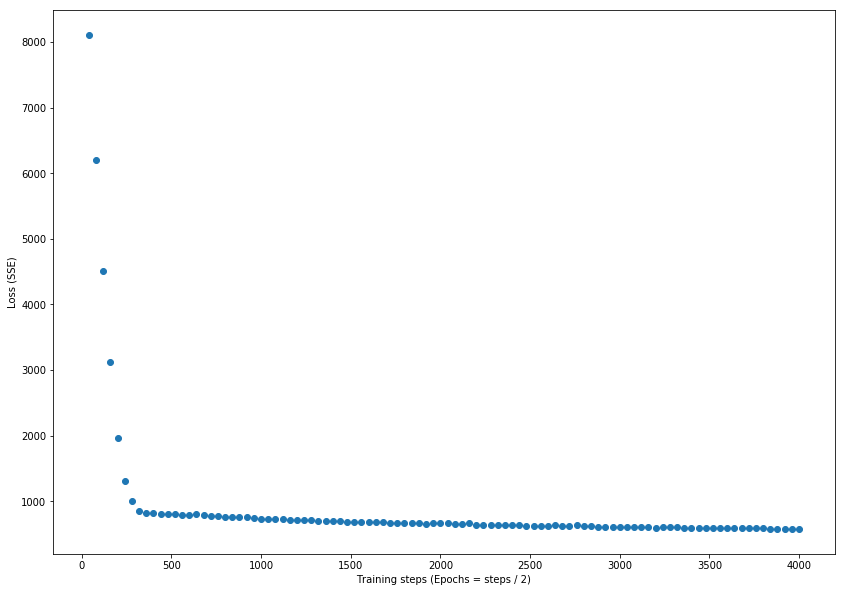

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

In [32]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print(X_test)

print(predictions)

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Celcius" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Celcius" % median_absolute_error(
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Maxwell\AppData\Local\Temp\tmp0fbfanx8\model.ckpt-45200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
     maxtempm  mintempm  meantempm_1  meantempm_2  meantempm_3  meandewptm_1  \
322        29        13         20.0         18.0         18.0          11.0   
799        31        16         22.0         18.0         16.0          11.0   
303        29        17         24.0         24.0         24.0          17.0   
141         3        -6          0.0         -4.0         -2.0          -3.0   
253        13         7         14.0         14.0         12.0           5.0   
700        14         3          8.0          6.0          4.0          -0.0   
550        16         4         10.0         12.0         16.0           4.0   
125         7        -2         -2.0         -2.0         -0

In [52]:
+type(X_test)

pandas.core.frame.DataFrame

In [56]:
print list(X_test)

SyntaxError: invalid syntax (<ipython-input-56-20e193081953>, line 1)

In [52]:
API_KEY = '40b453c139590191'  
BASE_URL = "http://api.wunderground.com/api/{}/history_{}/q/Switzerland/Collombey.json"
target_date = datetime(2018, 6, 21)  
features = ["date","meantempm", "meandewptm", "meanpressurem", "maxhumidity", "minhumidity", "maxtempm",  
            "mintempm", "maxdewptm", "mindewptm", "maxpressurem", "minpressurem", "precipm"]
DailySummary = namedtuple("DailySummary", features)

def extract_weather_data(url, api_key, target_date, days):  
    records_test = []
    for _ in range(days):
        request = BASE_URL.format(API_KEY, target_date.strftime('%Y%m%d'))
        response = requests.get(request)
        if response.status_code == 200:
            data = response.json()['history']['dailysummary'][0]
            records_test.append(DailySummary(
                date=target_date,
                meantempm=data['meantempm'],
                meandewptm=data['meandewptm'],
                meanpressurem=data['meanpressurem'],
                maxhumidity=data['maxhumidity'],
                minhumidity=data['minhumidity'],
                maxtempm=data['maxtempm'],
                mintempm=data['mintempm'],
                maxdewptm=data['maxdewptm'],
                mindewptm=data['mindewptm'],
                maxpressurem=data['maxpressurem'],
                minpressurem=data['minpressurem'],
                precipm=data['precipm']))
        time.sleep(6)
        target_date += timedelta(days=1)
    return records_test
records_test = extract_weather_data(BASE_URL, API_KEY, target_date, 5) 
#we use the data from x-n day to predict the mean temperature at the day x otherwise we could have missing data

In [53]:
print (records_test)

[DailySummary(date=datetime.datetime(2018, 6, 21, 0, 0), meantempm='25', meandewptm='13', meanpressurem='1016.92', maxhumidity='75', minhumidity='17', maxtempm='33', mintempm='17', maxdewptm='16', mindewptm='9', maxpressurem='1020', minpressurem='1011', precipm='0.0'), DailySummary(date=datetime.datetime(2018, 6, 22, 0, 0), meantempm='22', meandewptm='9', meanpressurem='1017.80', maxhumidity='68', minhumidity='17', maxtempm='27', mintempm='17', maxdewptm='14', mindewptm='4', maxpressurem='1022', minpressurem='1015', precipm='0.0'), DailySummary(date=datetime.datetime(2018, 6, 23, 0, 0), meantempm='18', meandewptm='6', meanpressurem='1020.90', maxhumidity='68', minhumidity='15', maxtempm='26', mintempm='10', maxdewptm='9', mindewptm='4', maxpressurem='1024', minpressurem='1015', precipm='0.0'), DailySummary(date=datetime.datetime(2018, 6, 24, 0, 0), meantempm='18', meandewptm='9', meanpressurem='1018.75', maxhumidity='68', minhumidity='28', maxtempm='24', mintempm='13', maxdewptm='12', 

In [62]:
df1 = pd.DataFrame(records_test, columns=features)

In [63]:
print(df1)
df1.info()

        date meantempm meandewptm meanpressurem maxhumidity minhumidity  \
0 2018-06-21        25         13       1016.92          75          17   
1 2018-06-22        22          9       1017.80          68          17   
2 2018-06-23        18          6       1020.90          68          15   
3 2018-06-24        18          9       1018.75          68          28   
4 2018-06-25        20         10       1017.55          82          18   

  maxtempm mintempm maxdewptm mindewptm maxpressurem minpressurem precipm  
0       33       17        16         9         1020         1011     0.0  
1       27       17        14         4         1022         1015     0.0  
2       26       10         9         4         1024         1015     0.0  
3       24       13        12         6         1021         1015     0.0  
4       28       12        11         8         1020         1013     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 co

In [74]:
df1 = df1.drop(['mintempm', 'maxtempm',"date"], axis=1)

In [57]:
print(df1)

  meantempm meandewptm meanpressurem maxhumidity minhumidity maxdewptm  \
0        25         13       1016.92          75          17        16   
1        22          9       1017.80          68          17        14   
2        18          6       1020.90          68          15         9   
3        18          9       1018.75          68          28        12   
4        20         10       1017.55          82          18        11   

  mindewptm maxpressurem minpressurem precipm  
0         9         1020         1011     0.0  
1         4         1022         1015     0.0  
2         4         1024         1015     0.0  
3         6         1021         1015     0.0  
4         8         1020         1013     0.0  


In [58]:
Xtrain1 = df1[[col for col in df1.columns if col != 'meantempm']]

In [59]:
print(Xtrain1)

  meandewptm meanpressurem maxhumidity minhumidity maxdewptm mindewptm  \
0         13       1016.92          75          17        16         9   
1          9       1017.80          68          17        14         4   
2          6       1020.90          68          15         9         4   
3          9       1018.75          68          28        12         6   
4         10       1017.55          82          18        11         8   

  maxpressurem minpressurem precipm  
0         1020         1011     0.0  
1         1022         1015     0.0  
2         1024         1015     0.0  
3         1021         1015     0.0  
4         1020         1013     0.0  


In [60]:
pred = regressor.predict(input_fn=wx_input_fn(Xtrain1,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])
print(predictions)

INFO:tensorflow:Calling model_fn.


ValueError: Feature maxdewptm_1 is not in features dictionary.

In [64]:
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements
for feature in features:
    if feature != 'date':
        for N in range(1,4):
            derive_nth_day_feature(df1, feature, N)    

In [67]:
print(df1)

                  date  meantempm  meandewptm  meanpressurem  maxhumidity  \
0  1529539200000000000         25          13        1016.92           75   
1  1529625600000000000         22           9        1017.80           68   
2  1529712000000000000         18           6        1020.90           68   
3  1529798400000000000         18           9        1018.75           68   
4  1529884800000000000         20          10        1017.55           82   

   minhumidity  maxtempm  mintempm  maxdewptm  mindewptm    ...      \
0           17        33        17         16          9    ...       
1           17        27        17         14          4    ...       
2           15        26        10          9          4    ...       
3           28        24        13         12          6    ...       
4           18        28        12         11          8    ...       

   mindewptm_3  maxpressurem_1  maxpressurem_2  maxpressurem_3  \
0          NaN             NaN             N

In [66]:
df1 = df1.apply(pd.to_numeric, errors="coerce")
print(df1)

                  date  meantempm  meandewptm  meanpressurem  maxhumidity  \
0  1529539200000000000         25          13        1016.92           75   
1  1529625600000000000         22           9        1017.80           68   
2  1529712000000000000         18           6        1020.90           68   
3  1529798400000000000         18           9        1018.75           68   
4  1529884800000000000         20          10        1017.55           82   

   minhumidity  maxtempm  mintempm  maxdewptm  mindewptm    ...      \
0           17        33        17         16          9    ...       
1           17        27        17         14          4    ...       
2           15        26        10          9          4    ...       
3           28        24        13         12          6    ...       
4           18        28        12         11          8    ...       

   mindewptm_3  maxpressurem_1  maxpressurem_2  maxpressurem_3  \
0          NaN             NaN             N

In [55]:
df1 = pd.DataFrame(records_test, columns=features)

In [68]:
print(df1)
df1.info()

                  date  meantempm  meandewptm  meanpressurem  maxhumidity  \
0  1529539200000000000         25          13        1016.92           75   
1  1529625600000000000         22           9        1017.80           68   
2  1529712000000000000         18           6        1020.90           68   
3  1529798400000000000         18           9        1018.75           68   
4  1529884800000000000         20          10        1017.55           82   

   minhumidity  maxtempm  mintempm  maxdewptm  mindewptm    ...      \
0           17        33        17         16          9    ...       
1           17        27        17         14          4    ...       
2           15        26        10          9          4    ...       
3           28        24        13         12          6    ...       
4           18        28        12         11          8    ...       

   mindewptm_3  maxpressurem_1  maxpressurem_2  maxpressurem_3  \
0          NaN             NaN             N

In [69]:
#we can now drop the data we used to have each data at x-n
df1 = df1.drop([0,1,2,3])

In [75]:
X = df1[[col for col in df1.columns if col != 'meantempm']]

In [80]:
print(X)
X.info()

   meantempm_1  meantempm_2  meantempm_3  meandewptm_1  meandewptm_2  \
4         18.0         18.0         22.0           9.0           6.0   

   meandewptm_3  meanpressurem_1  meanpressurem_2  meanpressurem_3  \
4           9.0          1018.75           1020.9           1017.8   

   maxhumidity_1    ...      mindewptm_3  maxpressurem_1  maxpressurem_2  \
4           68.0    ...              4.0          1021.0          1024.0   

   maxpressurem_3  minpressurem_1  minpressurem_2  minpressurem_3  precipm_1  \
4          1022.0          1015.0          1015.0          1015.0        0.0   

   precipm_2  precipm_3  
4        0.0        0.0  

[1 rows x 36 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 4 to 4
Data columns (total 36 columns):
meantempm_1        1 non-null float64
meantempm_2        1 non-null float64
meantempm_3        1 non-null float64
meandewptm_1       1 non-null float64
meandewptm_2       1 non-null float64
meandewptm_3       1 non-null floa

In [72]:
#we only use the info from the previous days
df1 = df1.drop(["meandewptm","meanpressurem","maxhumidity","minhumidity","maxdewptm","mindewptm","maxpressurem",
                "minpressurem","precipm"  ], axis=1)

In [79]:
pred = regressor.predict(input_fn=wx_input_fn(X,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])
print(X)
print(predictions)

INFO:tensorflow:Calling model_fn.


ValueError: Feature maxtempm is not in features dictionary.

TypeError: arg must be a list, tuple, 1-d array, or Series

In [95]:
X = X.apply(pd.to_numeric, errors="coerce")